In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4859/3255681906.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


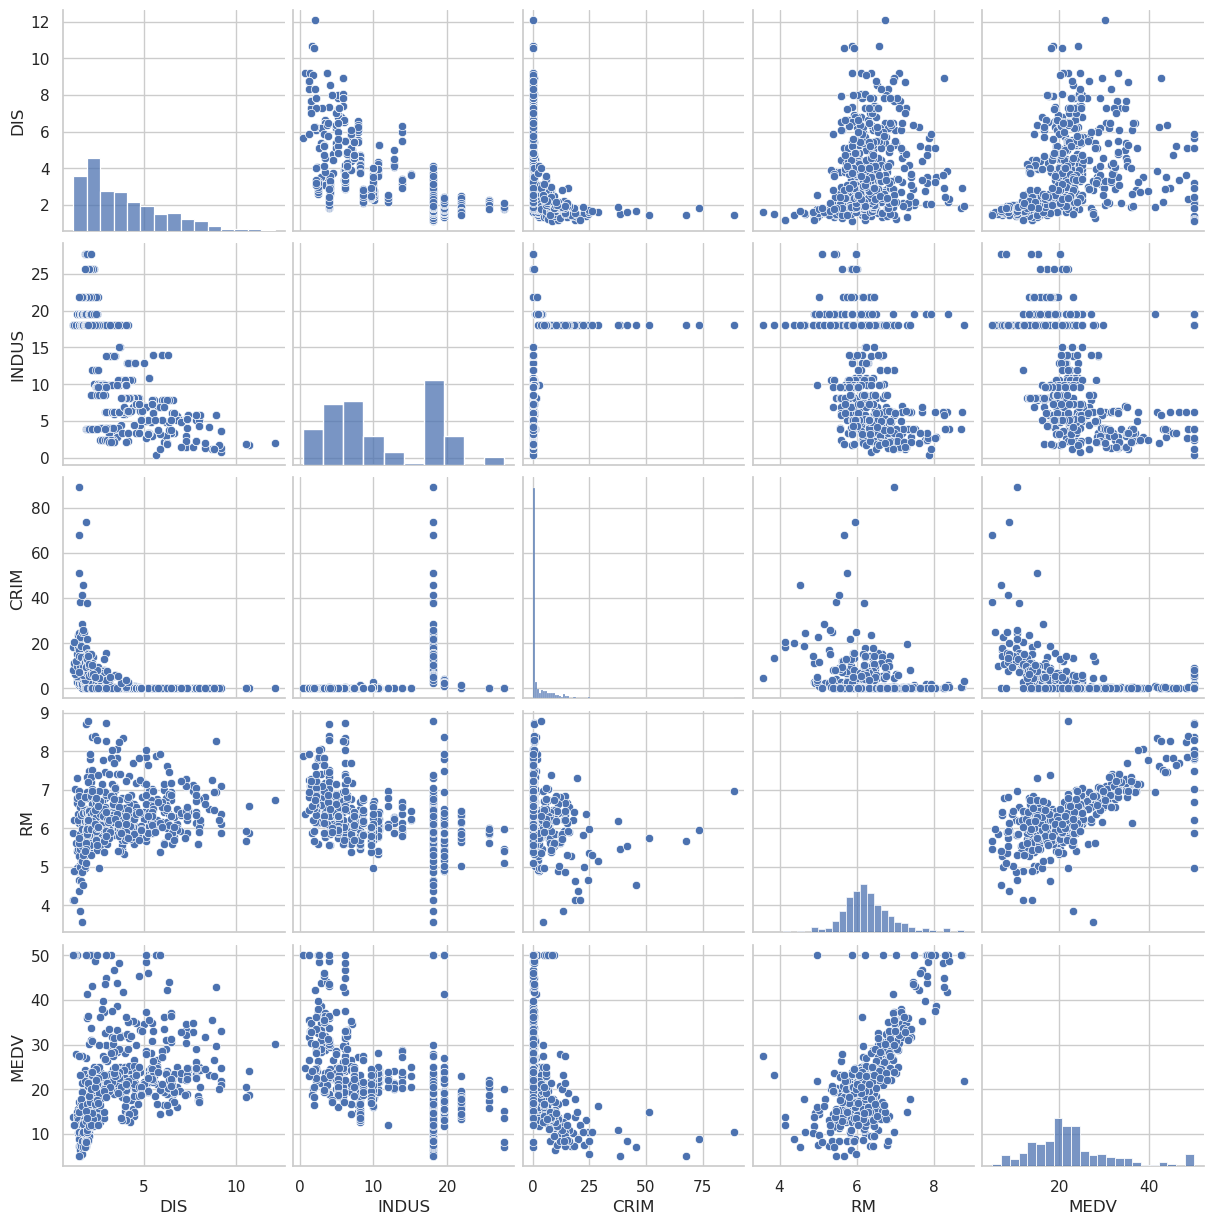

In [4]:
sns.set_theme(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

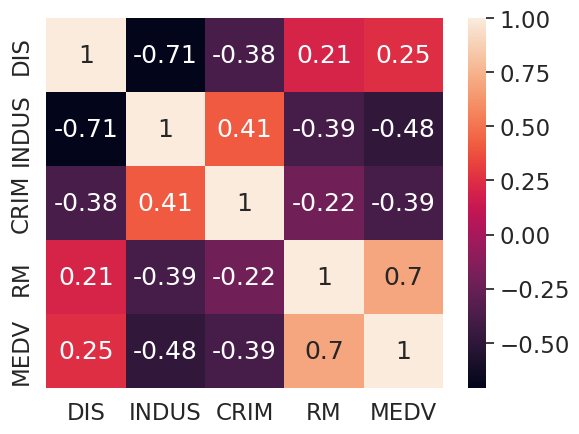

In [5]:
correlation_matrix = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.5)
sns.heatmap(correlation_matrix, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

StandardScaler standardizes features by removing the mean and scaling to unit variance. Thus, the model best fits the data. This minimizes errors when there are outliers.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [27]:

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

Linear regression uses the next formula:

y = w0 + w1 x

slr will predict the best values of w0 and w1 (weights) to get the best line to fit the data.

When to use a linear regression model?

- When you need to predict a numeric variable
- When most of independent variables are numeric
- When I don hat a lot of variables and/or categorical variables

Recommendations:

- Start using a linear regression model. If it doesn't work, use other models
- Use as few variables as possible
- Beware of miltilinearity. Don't use dependent variables (e.g., weight in kilos and weight in pounds)
- Don't predict out of the dependent variable's domain

Text(0.5, 0, 'Promedio de habitaciones (RM)')

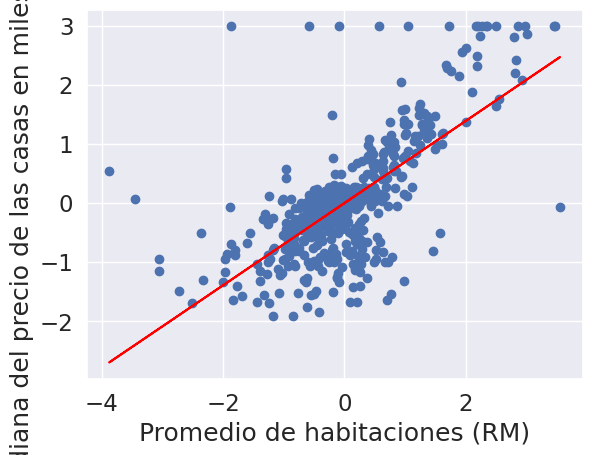

In [28]:
plt.scatter(X_std, y_std)
plt.plot(X_std,slr.predict(X_std),color="red")

plt.ylabel("Mediana del precio de las casas en miles (MEDV)")
plt.xlabel("Promedio de habitaciones (RM)")

### Generar predicción con el modelo

In [29]:
number_of_rooms = 5
number_of_rooms_std = sc_x.transform(np.array([number_of_rooms]).reshape(-1,1))

print("The price is ", sc_y.inverse_transform(slr.predict(number_of_rooms_std)))

The price is  [[10.83992413]]


Steps for a ML algorithm:

1. Fit the model
2. Compare results with real values
3. Adjust the model weights (w0, w1, ..., wn)
4. Go back to the initial steps if the model doesn't converge. If the results don't change much, the solution is almost finished

Loss function: least squares method

Optimization algorithm: the most common is the gradient descent

Main model evaluation methods:
- MSE (Mean squar error): it's used to evaluate the loss function. The larger the value, the worse the model. 
- R2 (Coefficient of determination): it uses the data variance. The close to 1, the better the model.

Other important metrics to consider:
- Adjusted R
- Maximum error
- MAE: Mean absolute error
- Median of the absolute errors
- RMSE: Root mean squared error
- Explained variance
- Residuals: plot your line horizontally to better see the distance between the points